In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_partidos = pd.read_csv('../data/partidos_cebollitas.csv')

df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']

X = df_partidos[['posesion_local (%)', 'tiros_arco_local']]
y = df_partidos['diferencia_goles']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [2]:
from sklearn.linear_model import LinearRegression

modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

print("Modelo entrenado con éxito.")

Modelo entrenado con éxito.


In [5]:
# Mostrar coefficients del modelo
print(f"Intercepto: {modelo_lr.intercept_}")
print(f"Coeficientes: {modelo_lr.coef_}")

for idx, col_name in enumerate(X.columns):
    print(f"si aumentas {col_name} en 1, la diferencia de goles cambia en {modelo_lr.coef_[idx]:.4f}")

Intercepto: -2.5257192572329763
Coeficientes: [ 0.05596278 -0.05125811]
si aumentas posesion_local (%) en 1, la diferencia de goles cambia en 0.0560
si aumentas tiros_arco_local en 1, la diferencia de goles cambia en -0.0513


In [6]:
y_pred = modelo_lr.predict(X_test)

df_resultados = X_test.copy()
df_resultados['Diferencia_Goles_Real'] = y_test
df_resultados['Diferencia_Goles_Predicha'] = y_pred.round(2)

df_resultados.head(10)

,posesion_local (%),tiros_arco_local,Diferencia_Goles_Real,Diferencia_Goles_Predicha
83,47,3,3,-0.05
53,60,3,3,0.68
70,50,5,0,0.02
45,57,7,3,0.31
44,45,5,5,-0.26
39,60,7,3,0.47
22,45,11,0,-0.57
80,49,5,1,-0.04
10,48,5,-2,-0.10
0,54,12,2,-0.12


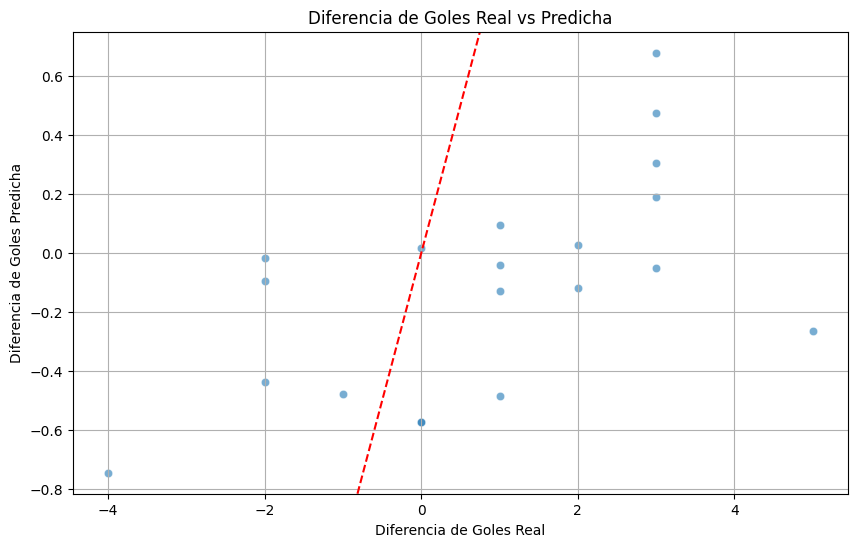

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x = y_test, y = y_pred, alpha=0.6)
plt.xlabel('Diferencia de Goles Real')
plt.ylabel('Diferencia de Goles Predicha')
plt.title('Diferencia de Goles Real vs Predicha')
plt.axline((0, 0), slope=1, color='red', linestyle='--')
plt.grid()
plt.show()

In [10]:
import ipywidgets as widgets

posesion_input = widgets.FloatSlider(min=30, max = 70, step=1, description= 'Posesion (%)')
tiros_input = widgets.IntSlider(min=1, max = 15, step=1, description= 'Tiros al arco')

def predecir_goles(posesion, tiros):
    entrada = pd.DataFrame([[posesion, tiros]], columns=['posesion_local (%)', 'tiros_arco_local'])
    pred = modelo_lr.predict(entrada)[0]
    print(f"Predicción de diferencia de goles: {pred:.2f}")

widgets.interact(predecir_goles, posesion=posesion_input, tiros=tiros_input)

interactive(children=(FloatSlider(value=30.0, description='Posesion (%)', max=70.0, min=30.0, step=1.0), IntSl…

<function __main__.predecir_goles(posesion, tiros)>